**At the start of each notebook there will be 3 - 5 cells of code that need to be run before the rest of the notebook. These cells make sure we have imported all the required Python packages so that we can run the rest of the code without issue!**

In [ ]:
# import core python packages that we'll use for plotting and data manipulation.
import sys
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Tell us a little bit about your system
Victor = False ###### <------ Turn to True if using Victor
if Victor is False:
    Windows = False ###### <----- Turn to True if using Windows

In [2]:
if Victor is True:
    sys.path.append(r"/home/jovyan/shared/Models/alphaMELTS/")

In [4]:
# let's load the MELTS packages. The third line isn't strictly necessary but helps us check the alphaMELTS files are all 'discoverable'
import PetThermoTools as ptt 
import Thermobar as pt
from meltsdynamic import MELTSdynamic

print(ptt.__version__)
print(pt.__version__)

0.2.13dev
1.0.43


In [6]:
## If using Mac run this cell **twice** 
if Windows is False:
    sys.stdout = open(os.devnull, 'w')
    sys.stderr = open(os.devnull, 'w')

# Part 1 - Using Melt Inclusion datasets to practice data handling in Python

In the first part of this workshop we'll run some simple calculations with PetThermoTools and use the inputs/outputs to go over some basic data handling techniques/methods in Python to make sure everyone is comfortable with the basics of Pandas and matplotlib.

As the theme of GSA Connects 2024 is 'Life along an Active Margin' let's start with some magmas associated with active margin volcanism! In the cell below I've provided some code that loads in melt inclusion data from various arc volcanoes around the world (data taken from the supplement of Rasmussen et al. 2022).

The first line uses Pandas () to read the excel file. Pandas is incredibly useful for handling geochemical data as it reads in the data in a format similar to that of an excel spreadsheet. Secondly I fill all missing data in this spreadsheet with zeros (**fillna(0.0)**). This isn't strictly necessary but it does help to ensure the code runs smoothly without errors. Finally, by calling the name of the new DataFrame followed by **.head()** we can print the first 5 rows of the DataFrame, useful for checking that the data was imported as we expected! 

In [45]:
# load in the excel sheet with the melt inclusion data
MI_All = pd.read_excel('MI_Arcs.xlsx', sheet_name='Data')
MI_All = MI_All.fillna(0.0)
MI_All.head()

Let's now have a look at what volcanoes we have in the dataset. Typing the name of the DataFrame, then the column header (in this case 'Volcano') followed by **.unique()** will provide us with a list of all unique values within that column.

In [44]:
############## Type MI_All['Volcano'].unique() below to identify what volcanoes are in the dataset ######################


We can also start to think about what data we do, or don't, want for our calculations. In this notebook we'll use the H2O (and CO2 when present) contents of the melt inclusions to assess the apparent entrapment depths (issues relating to water loss by diffusion and/or missed CO2 in the glass phase or a vapor bubble might affect these calculations). For these calculations we are only really interested in melt inclusions where H2O and CO2 have been measured. Let's 'filter' our DataFrame to only include rows with H2O and CO2 contents greater than 0.0.

Running the second line (**.reset_index()**) helps to ensure that the row (or index) numbers run continuously without jumps/gaps (i.e., from 0 to n).

In [9]:
MI_All = MI_All.loc[(MI_All['H2O_Liq'] > 0.0) & (MI_All['CO2_Liq'] > 0.0),:].copy()
MI_All = MI_All.reset_index(drop = True)

**Now have a go at isolating data from three different volcanoes of the Aleutian Arc: Augustine, Okmok, and Shishaldin. You should end up with three separate DataFrames - I have done the first calculation for you!**

Hint MI_All['Volcano'].unique() will tell you the volcano names.

In [46]:
# Let's isolate three separate dataframes for three volcanoes in the Aleutian Arc, Augustine, Okmok, and Shishaldin
Augustine = MI_All.loc[MI_All['Volcano'] == 'Augustine'].copy()
Augustine = Augustine.reset_index(drop = True)
Augustine.head()

We can also combine DataFrames using the **pd.concat()** function. Here we can take the three DataFrames we just created for the different volcanoes and concat them into a single DataFrame called 'Aleutians'.

In [11]:
Aleutians = pd.concat([Augustine, Okmok, Shishaldin]) # make sure you use the correct variable names
Aleutians = Aleutians.reset_index(drop = True)

Let's now plot up some of this data. We can use the package matplotlib for most of our plotting and one useful application of matplotlib is to make subplots. Here you can define multiple graphs stored in a single parameter (called **a** below). If you want to plot data on the first graph you can start a line of code with a[0].plot(). Similarly to plot on the second graph start with a[1].plot().

In [47]:
# Change variable names if you didn't call your DataFrames 'Shishaldin' and 'Okmok'
f, a = plt.subplots(1,2, figsize = (6.5, 3))
a[0].plot(Shishaldin['MgO_Liq'], Shishaldin['FeOt_Liq'], 'ok', mfc = 'y', label = "Shishaldin")
a[0].plot(Okmok['MgO_Liq'], Okmok['FeOt_Liq'], 'ok', mfc = 'b', label = "Okmok")
a[0].plot(Augustine['MgO_Liq'], Augustine['FeOt_Liq'], 'ok', mfc = 'r', label = "Augustine")

a[0].set_xlabel('MgO (wt%)')
a[0].set_ylabel('FeO$_t$ (wt%)')
a[0].legend(fontsize = 6)

############## Plot MgO vs an oxide of your choice for the melt inclusions data from the three volcanoes ###########
a[1].plot(Shishaldin['MgO_Liq'], Shishaldin['K2O_Liq'], 'ok', mfc = 'y', label = "Shishaldin")
a[1].plot(Okmok['MgO_Liq'], Okmok['K2O_Liq'], 'ok', mfc = 'b', label = "Okmok")
a[1].plot(Augustine['MgO_Liq'], Augustine['K2O_Liq'], 'ok', mfc = 'r', label = "Augustine")

a[1].set_xlabel('MgO (wt%)')
a[1].set_ylabel('K$_2$O (wt%)')
# a[1].legend(fontsize = 6)

f.tight_layout()

Another useful plot for visualizing data is Violin plots. Using the seaborn package (imported earlier) we can easily create violin plots from any DataFrame. All we need to do is tell the code which column we'd like to use to separate or segment the data (here we segment the data by the different volcano names) and what variable we want to plot on the y-axis. In this case we can visualize the H2O measured in melt inclusions form each volcano:

In [48]:
# Create a figure and construct violin plots for the Aleutian data.
plt.figure(figsize=(10, 6))
sns.violinplot(x='Volcano', y='H2O_Liq', data=Aleutians, cut=0, inner = "point")

plt.xlabel('Location')
plt.ylabel('H$_2$O (wt%)')

## Part 2 - Temperature and pressure of entrapment.

Hopefully that's given everyone a (very) quick introduction to data handling and plotting in Python! Now let's do some thermodynamics!

In this example notebook we'll use PetThermoTools to assess the storage pressure of these inclusions based on the measured H2O (and CO2) content while simultaneously solving for the liquidus temperature. The following function will iterate both pressure and temperature to simultaneously solve for both parameters. 

In [23]:
# Assess volatile saturation pressure and liquidus temperature of the melt inclusions.
Sat_P = ptt.findSatPressure(Model = "MELTSv1.2.0",
                          bulk = Aleutians,
                          T_C_init = 1200,
                          P_bar_init=1000,
                          fO2_buffer="FMQ",
                          fO2_offset=2,
                          copy_columns=['Sample','Volcano'])

  0%|          | 0/16 [00:00<?, ?it/s]

As we did above we can use the **.head()** command to inspect the results. Note that the 'merge_on' kwarg means that the Sample and Volcano name will be copied across to the new DataFrame.

In [49]:
Sat_P.head()

Try making two new Violin plots showing the estimates pressure and temperature obtained from the results above. 

**HINT - copy the code above used to make a violin plot of H2O contents and simply change the variables.**

In [50]:
################ Create a violin plot showing the estimated pressures. ##################

In [51]:
################ Create a violin plot showing the estimated temperatures. ##################

- What are the differences in pressure & temperature of storage for these different volcanoes?
- What uncertainties or errors might influence these estimates?

The difference in estimated storage pressure between arc volcanoes located above thicker crust (Augustine) and thinner crust (Okmok) led to the hypothesis that magma H2O contents control magma storage pressures (Rasmussen et al. 2022; https://doi.org/10.1126/science.abm5174).

# Part 3 - Simple equilibrate calculations at a given pressure and temperature.

Another useful calculation that we can do with PetThermoTools is assess the equilibrium state of the system for any given composition and set of conditions (i.e., P, T, fO2). As an example, let's use the pressures and temperatures determined above to predict the phase stability near the liquidus for the different melt compositions.

In [29]:
############## Enter the temperature and pressure at which to perform the equilibrate calculations ################
############## The T_C and P_bar kwargs can either take a single value or an array of values the ################
############## same length as the number of compositions in the input DataFrame (Aleutians) ###############
Equil = ptt.equilibrate_multi(Model = "MELTSv1.2.0",
                              bulk = Aleutians,
                              T_C = , # enter temperature inputs
                              P_bar = , # enter pressure inputs
                              fO2_buffer = "FMQ",
                              fO2_offset = 2,
                              copy_columns = ['Sample', 'Volcano'])

  0%|          | 0/16 [00:00<?, ?it/s]

We can now assess what phases were stablized in the PetThermoTools calcuations by examining all rows in the output DataFrame that contain the string 'mass' (I am in the process of adding a separate 'PhaseList' variable to the outout so this should be available in later versions).

Have a look at the code below. 

- What phase is predicted to crystallize from these magmas within 5 degrees of the liquidus temperature?
- Most of these inclusions are found in olivine crystals. Is olivine the stable phase at these conditions?
- What parameters could we change that might influence the phase stability? **Have a go at re-runing the findSatPressure and equilibrate_multi functions with different conditions to see how this affects the phase stability.**

In [52]:
Equil.loc[:,Equil.columns.str.contains('mass')]

# Part 4 - Optional extra: Modelling the influence of starting parameters on fractional crystallization trajectories

One of the interesting features of the Aleutian arc is the transition from tholeiitic differentiation series at the SW end of the arc (including Shishaldin) through to calc-alkaline differentiation series at the NE end of the arc (including Augustine). Okmok actually lies intermediate between the two end-members and so what we can do with PetThermoTools is take an estimate for a relatively primitive magma composition from Okmok as our starting composition to investigate how changing the crystallization parameters might control whether magmas follow a calc-alkaline or tholeiitic crystallization trajectory. 

This idea for this workflow is taken from an in review (or in revision) paper by Brad Pitcher which I saw an early version presented at AGU in 2019. To learn more about the calc-alkaline vs tholeiitic differentation series in the Aleutians I recommend this paper by Zimmer et al. (https://doi.org/10.1093/petrology/egq062). Within this paper they define a parameter THI representing the ratio of the FeOt content of the magma at 4 wt% MgO to the FeOt content at 8 wt% MgO. Assuming a fixed starting composition for our models (below) we can simply use the FeOt content at 4 wt% MgO to assess the influence of different factors on the calc-alkaline vs tholeiitic differentiation series.

In [32]:
# Let's define our starting composition.
okmok_starting = {'SiO2': 50.04,
                'TiO2': 0.81,
                'Al2O3': 15.01,
                'FeOt': 9.62,
                'MnO': 0.16,
                'MgO': 7.28,
                'CaO': 11.52,
                'Na2O': 2.54,
                'K2O': 0.30,
                'P2O5': 0.06}

In [39]:
# Generate 16 linearly spaces units between -1 and +3 log units around the FMQ buffer
# H2O = np.linspace()
# P_bar = np.linspace()
fO2_offset = np.linspace(-1,3,4)

In [40]:
# Run the calculation
Results = ptt.isobaric_crystallisation(Model = "MELTSv1.2.0",
                                       bulk = okmok_starting,
                                       P_bar = 2000,
                                       H2O_Liq = 4,
                                       fO2_buffer = "FMQ",
                                       fO2_offset = fO2_offset,
                                       find_liquidus = True,
                                       Frac_fluid=True,
                                       Frac_solid=True,
                                       T_end_C = 950,
                                       dt_C = 2,
                                       label = 'fO2')

# inspect the outputs
Results.keys()

  0%|          | 0/25 [00:00<?, ?it/s]

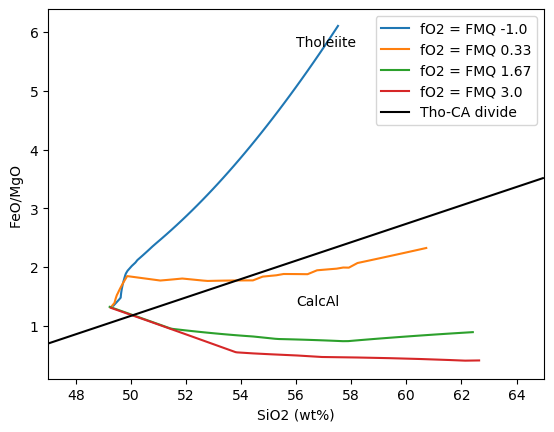

In [ ]:
x='SiO2_Liq'
y='FeO/MgO'
for key in Results.keys():
    print(key)
    # Lets add a column for FeO/MgO
    fO2 = Results[key]['Input']['fO2_offset']
    Results[key]['All']['FeO/MgO']=Results[key]['All']['FeOt_Liq']/Results[key]['All']['MgO_Liq']
    plt.plot(Results[key]['All'][x],Results[key]['All'][y],
    '-', label=key)

## Lets add approximate boundary from web plot digitizer!
plt.plot([45, 64.95495495495496], [0.3876918668171161, 3.5129224652087476], '-k', label='Tho-CA divide')

plt.xlim([47, 65])
plt.annotate('CalcAl', xy=[0.5, 0.2], xycoords="axes fraction", fontsize=10)
plt.annotate('Tholeiite', xy=[0.5, 0.9], xycoords="axes fraction", fontsize=10)

plt.ylabel('FeO/MgO ')
plt.xlabel('SiO2 (wt%)')
plt.legend()

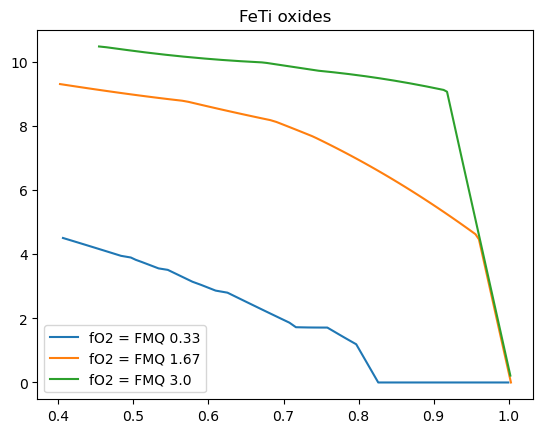

In [ ]:
x='mass_Liq'
y='spinel1_cumsum'

for key in Results.keys():
    print(y)
    print(Results[key]['Mass'].columns)
    if y in Results[key]['Mass'].columns:
        print(key)
        plt.plot(Results[key]['All'][x]/100,Results[key]['Mass'][y],
        '-', label=key)
        plt.legend()
        plt.title('FeTi oxides')

In [2]:
for key in Results:
    plt.plot(Results[key]['All']['MgO_Liq'], Results[key]['All']['FeOt_Liq'], '-', label=key)
plt.legend()
plt.xlabel('MgO')
plt.ylabel('FeO')

Rerun the code changing (independently) the fO2, H2O and pressure of the system. Which of these has the biggest influence on the differentiation path most likely to be followed?